## Import

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import descartes
from shapely.geometry import Point, Polygon
import geopandas as gpd
import shapefile as shp
import seaborn as sns
import numpy as np

%matplotlib inline

## Set up

In [2]:
# Initialize the grid figure
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [3]:
# Load the shapefile
sf = shp.Reader('shapes/City_of_Atlanta_Neighborhood_Statistical_Areas.shp')
# Read the shapefile as a pandas dataset
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df
df = read_shapefile(sf)
# Here's a sample
df.sample(5)

,OBJECTID,NPU,STATISTICA,POP2010,NEIGHBORHO,URL,pop,white,black,asian,other,hispanic,GlobalID,last_edite,coords
25,26,NPU C,C03,3516,"Brandon, Castlewood, Westminster/Milmar, Woodf...",http://documents.atlantaregional.com/AtlantaPr...,3516,93.7,1.8,2.2,0.6,1.7,{91321B0B-A6CA-4D63-9854-03F4A6924705},,"[(-84.40765021359724, 33.837637452229494), (-8..."
101,102,NPU N,N01,3750,"Cabbagetown, Reynoldstown",http://documents.atlantaregional.com/AtlantaPr...,3750,59.1,31.0,2.3,2.8,4.8,{1E980AC2-213A-4CF3-8D9A-B4CF25AF2B3C},,"[(-84.3491971916332, 33.74811043548109), (-84...."
61,62,NPU P,P04,2719,"Ben Hill Terrace, Kings Forest, Old Fairburn V...",http://documents.atlantaregional.com/AtlantaPr...,2719,1.0,95.2,0.5,1.6,1.7,{372BDFDE-6A5C-4357-B20D-8D13A36949C4},,"[(-84.50984923578777, 33.708280421542916), (-8..."
71,72,NPU H,H03,4095,"Fairburn Mays, Mays",http://documents.atlantaregional.com/AtlantaPr...,4095,0.7,95.9,0.1,1.8,1.4,{BDA85B9F-D37A-405E-BCBC-4F6E5D4437CB},,"[(-84.51758023957339, 33.73028542539529), (-84..."
97,98,NPU Z,Z02,2851,Thomasville Heights,http://documents.atlantaregional.com/AtlantaPr...,2851,0.5,97.8,0.2,1.1,0.5,{657EE020-9125-44B1-A8C3-5D606CE198E7},,"[(-84.36202619311142, 33.70877042633826), (-84..."


## Play with data

In [4]:
# If you want to find a specific value:
#df[df.NEIGHBORHO == 'Airport']
# If you want to print out a feature's values
# df.NEIGHBORHO
# df.NPU

(-84.42379407925165, 33.6552090904095)

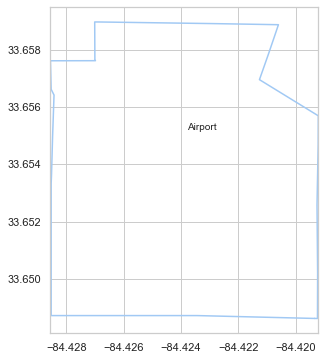

In [5]:
# Draw a specific neighborhood
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0
# Test out
hood = 'Airport'
hood_id = df[df.NEIGHBORHO == hood].index.to_numpy()[0]
plot_shape(hood_id, hood)

## Construct full map

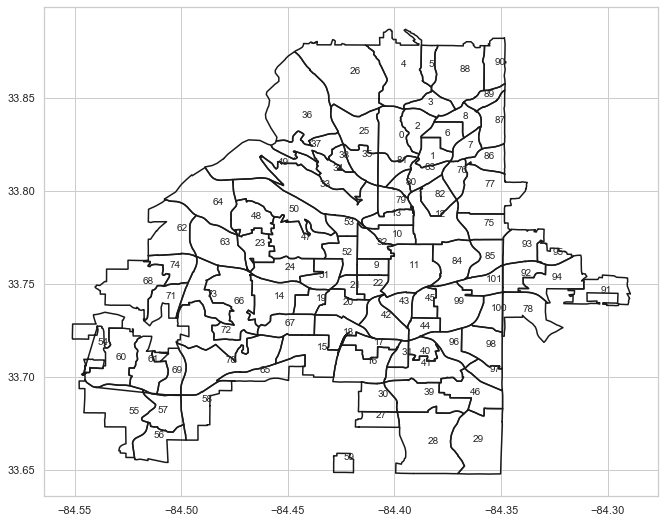

In [6]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
# Plot the map
plot_map(sf)

## Coloring Neighborhoods

<Figure size 792x648 with 0 Axes>

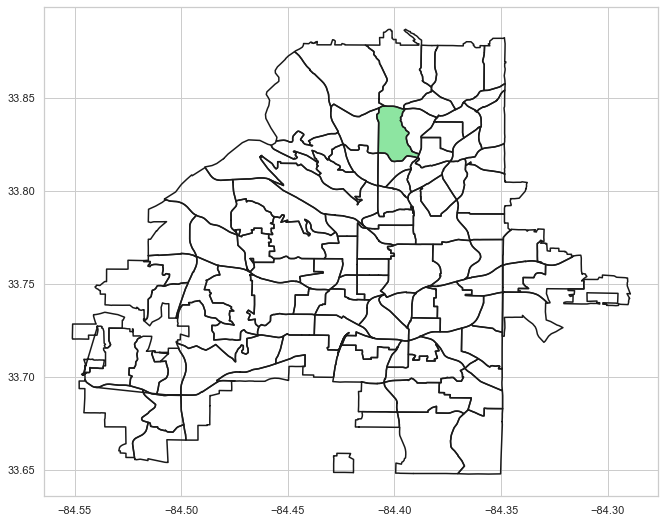

In [7]:
# Individual
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
plot_map_fill(0, sf, None, None, color='g')

<Figure size 792x648 with 0 Axes>

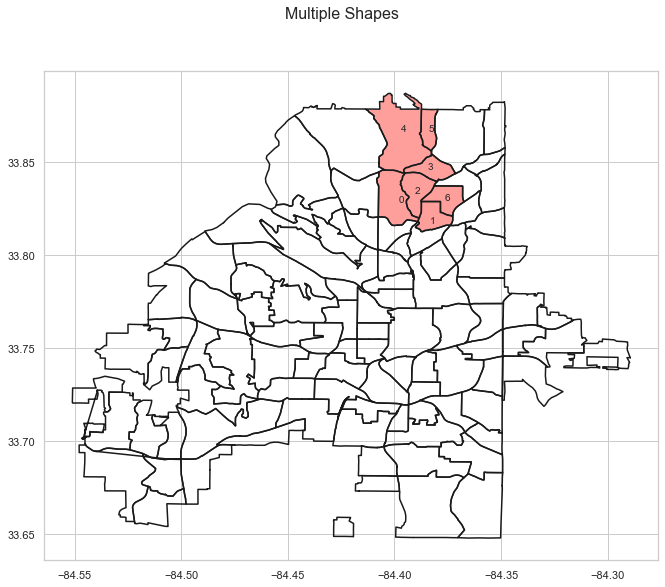

In [8]:
# Multiple
def plot_map_fill_multiples_ids(title, hoods, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in hoods:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
# Test
hood_id = [0, 1, 2, 3, 4, 5, 6]
plot_map_fill_multiples_ids("Multiple Shapes", 
                            hood_id, sf, color = 'r')

## Translate Names To Neighborhoods

<Figure size 792x648 with 0 Axes>

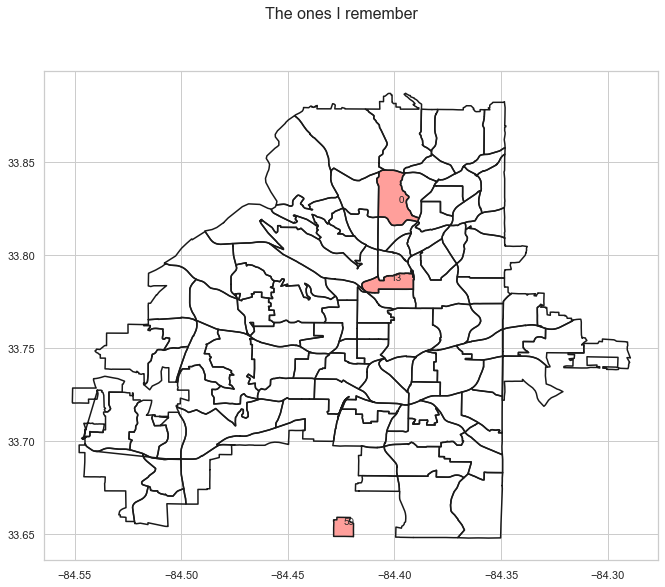

In [9]:
# Converts the neighborhoods' names into their SHP id equivalent
def name_to_id(sf, hoods):
    df = read_shapefile(sf)
    hood_id = []
#     print(len(hoods))
#     t = 1
    for i in hoods:
        # Check if we can find the name with no problems
        if len(df[df.NEIGHBORHO.str.contains(i)].index.to_numpy()) == 0:
            # We couldn't. Let's find the first word of it instead
            i = i.partition(' ')[0]
            if len(df[df.NEIGHBORHO.str.contains(i)].index.to_numpy()) == 0:
                # We couldn't. Let's just say we couldn't find any mention of it and move on
                hood_id.append(None)
                continue
#         print(t)
#         t = t+1
#         print(df[df.NEIGHBORHO == i].index.to_numpy(), i)
#         print(df[df.NEIGHBORHO.str.contains(i)].index.to_numpy(), i)
        hood_id.append(df[df.NEIGHBORHO.str.contains(i)].index.to_numpy()[0])
    return hood_id

def plot_hoods_2(sf, title, hoods, color):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    df = read_shapefile(sf)
    hood_id = name_to_id(sf, hoods)
    
    plot_map_fill_multiples_ids(title, hood_id, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color);
# Choose a few
non_residential = ['Airport', 'Peach', 'Home']
plot_hoods_2(sf, 'The ones I remember', non_residential, 'r')
plt.savefig('sample.png')

## Start Color-coding

In [10]:
# Split data into bins for colors
def calc_color(data, color=None):
        if color   == 1: color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; colors = 'YlGnBu';
        elif color == 3: color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; colors = 'Greys';
        elif color == 9: color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; colors = 'YlOrBr';
        # Check if the min is unique. If it has duplicates, pick one at random, and set it to x-1
        m = min(data)
        if np.count_nonzero(data == m, axis=0) > 1:
            data[np.where(data == m)[0][0]] = m-1
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [11]:
# Adapt the previous functions to work with the new color-coding function
def plot_hoods_data(sf, title, hoods, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected hoods, using specific color
    '''
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    hood_id = []
    for i in hoods:
        if print_id:
            hood_id.append(df[df.NEIGHBORHO == 
                                i].index.to_numpy()[0])
        else:
            hood_id.append(i)
    plot_map_fill_multiples_ids_tone(sf, title, hood_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

def plot_map_fill_multiples_ids_tone(sf, title, hoods,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
    for id in hoods:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[hoods.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
        if (x_lim != None) & (y_lim != None):     
            plt.xlim(x_lim)
            plt.ylim(y_lim)

In [12]:
# Call up the csv dataset
#new_f = pd.read_csv("cobra-clean.csv", sep=',', header=0, usecols = lambda column : column in ["Occur Date", "Neighborhood", "Shift Occurence"])
new_f = pd.read_csv("cobra-clean2009.csv", sep=',', header=0, usecols = lambda column : column in ["Neighborhood", "Shift Occurence", "Crime Category"])
crs = {'init': 'epsg:4326'}
#new_f.head()
# print(new_f["Neighborhood"].str.contains("Wildwood (NPU-C)"))
print(len(new_f[new_f['Neighborhood'] == 'Edmund']))
# Counts number of crimes given names of neighborhoods
def count_crimes(dataset, names):
    data = []
    for i in names:
        data.append(len(dataset[dataset['Neighborhood'] == i]))
    return data

0


In [13]:
# Test
non_residential = ['Airport', 'Peach', 'Home'] # Some neighborhoods
print_id = False # The shape id will be printed
color_pallete = 1 # 'Purples'
def remove_dupes(l):
    out = []
    for i in l:
        if i not in out:
            out.append(i)
    return out
names = remove_dupes(new_f['Neighborhood'])
data = count_crimes(new_f, names)
names_id = name_to_id(sf, names)
# names = name_to_id(sf, non_residential)
# data = df.POP2010

D:\Anaconda3\envs\mine\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [14]:
# print(df.NEIGHBORHO[df.NEIGHBORHO.str.contains("E")])
# print(names)
# print(data)
def combine_data_names(names, data):
    # First, clean it up of any instances of None
    for i in range(len(names)):
        if names[i] is None:
            names.pop(i)
            data.pop(i)
    new_names = np.unique(names)
    new_data = np.zeros(np.shape(new_names))
    for n in range(len(new_names)):
        # Gonna use this to add up repeated datapoints
        repititions_of_n = [r for r in range(len(names)) if names[r] == new_names[n]]
        for i in repititions_of_n:
            if(data[i] is None):
                data[i] = 0
#             print(n, i)
#             print(new_data[n])
#             print(data[i])
            new_data[n] = data[i] + new_data[n]
    return new_names, new_data
new_names, new_data = combine_data_names(names_id, data)
# print(len(new_names), new_names)
# print(len(names), names)
# # print(len(new_data), new_data)
# print(np.sum(new_data), np.sum(data))


1: 7 => 539 
2: 540 => 1759 
3: 1760 => 2354 
4: 2355 => 3081 
5: 3082 => 4758 
6: 4759 => 26582 

   1   2   3   4   5   6


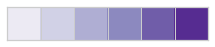

<Figure size 792x648 with 0 Axes>

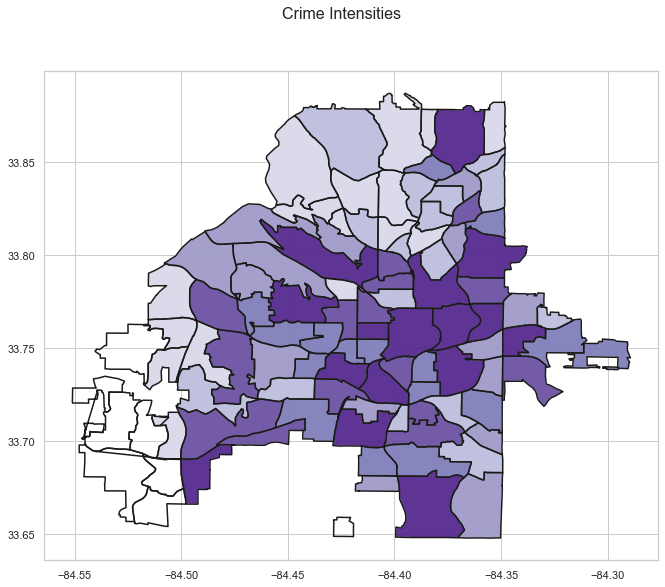

In [15]:
plot_hoods_data(sf, 'Crime Intensities', new_names, new_data, color_pallete, print_id)
plt.savefig('sample.png')


1: -1 => -1 
2: 0 => 1 
3: 2 => 4 
4: 5 => 8 
5: 9 => 15 
6: 16 => 44 

   1   2   3   4   5   6


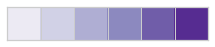

<Figure size 792x648 with 0 Axes>

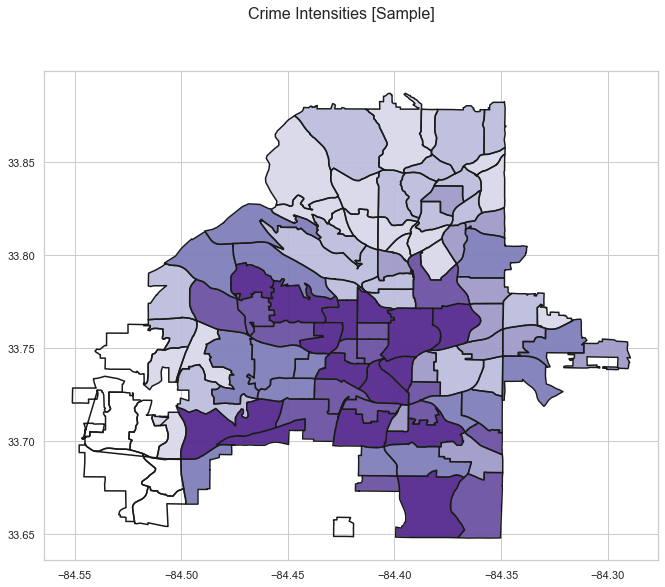

In [22]:
# Count the crime occurrences for each category
def count_crimes_cat1(dataset, names):
    dataset = dataset[dataset['Crime Category'] == 1]
    data = []
    for i in names:
        data.append(len(dataset[dataset['Neighborhood'] == i]))
    return data
data = count_crimes_cat1(new_f, names)
# names = name_to_id(sf, names)
new_names, new_data = combine_data_names(names_id, data)
plot_hoods_data(sf, 'Crime Intensities [Sample]', new_names, new_data, color_pallete, print_id)
plt.savefig('sample.png')